# TITANIC

## Introduction

Background story...

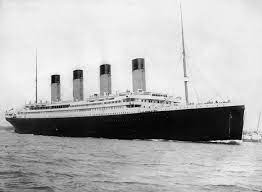



## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
import sklearn.tree as skTree
import sklearn.metrics as skMetrics
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

## Subtitle

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import io
# df2 = pd.read_csv(io.BytesIO(uploaded['titanictrain.csv']))

# Importing the dataset with read_csv and displaying the data.


In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

df = pd.read_csv("titanictrain.csv")
df.head(5)  # Used to display top 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail(5) # Used to display last 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **Data** **Exploration**

# Accessing specific coloums which are needed.

In [4]:
# Clean Train Data
df= df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Get more information about the database by using describe method.

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# find columns with nan in Training set
for NAN in df.columns:
    if df[NAN].isna().any()==True:
        print("Total missing values in {} for Training data is". format(NAN))
        print(df[NAN].isna().sum())

Total missing values in Age for Training data is
177
Total missing values in Embarked for Training data is
2


In [7]:
#Clean Train Data
df['Age'].fillna(df['Age'].mean(), inplace=True)
#deleting the 2 missing values for embarked
df=df[df['Embarked'].isna()==False]
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Counting the occurences of variables


In [9]:
df["Sex"].value_counts()


,count
Sex,
male,577
female,312


# Using .nunique() to count number of unique values that occur in dataset or in a column

In [10]:
df.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Fare,247
Embarked,3


# Filtering

**AND operator**

In [11]:
df_age = df["Age"] < 50
df_sex_mask = df["Sex"] == "female"
df[df_age & df_sex_mask].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


**OR operator**

In [12]:
df_sex = df["Sex"] == "Male"
df_age_mask = df["Age"] > 70
df[df_sex | df_age_mask]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
851,0,3,male,74.0,0,0,7.7750,S


# Calculating how many passengers survived.
Here 1 = survived, and 0 = Not survived.


In [13]:
count = df['Survived'].value_counts()
print(count)
# Let us see that in percentage.

percentage = df['Survived'].value_counts() * 100 / len(df)
print(percentage)

Survived
0    549
1    340
Name: count, dtype: int64
Survived
0    61.754781
1    38.245219
Name: count, dtype: float64


<Axes: xlabel='Survived'>

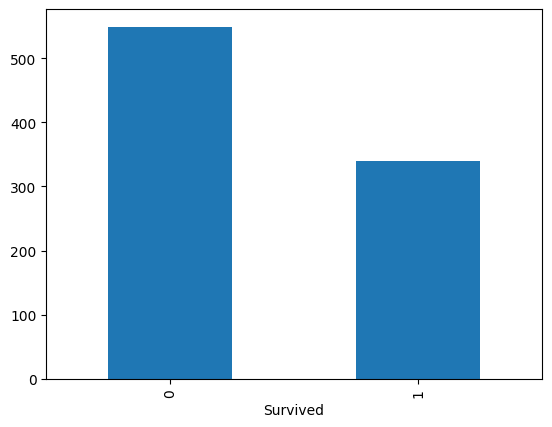

In [14]:
%matplotlib inline
color = 0.5
df['Survived'].value_counts().plot(kind = 'bar')

In [15]:
# %% now lets view data types to the features
print(df.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [16]:
# %% now lets assign data types to the features
Integer_features=['Age','SibSp','Parch']
Categorical_features=['Pclass','Sex','Embarked']

for FEATURES in Integer_features:

    df[FEATURES] = df[FEATURES].astype('int64')

for FEATURES in Categorical_features:
    df[FEATURES] = df[FEATURES].astype('category')

In [17]:
# %% now lets view data types to the features
print(df.dtypes)

Survived       int64
Pclass      category
Sex         category
Age            int64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object


# Splitting the Dataset

Vertical Split

In [18]:
# %% now lets separate the label from the Training data set
TargetLabel=df['Survived']
# now we will remove the target label (Survived from the training clean data set)
df= df.drop(['Survived'],axis=1)

In [19]:
# # %% now lets convert this categorical varibales into numerical by creating dummy variables. One hot encoding
# ## even though Pclass is in numbers, we would still convert into dummy varibales because the three classes is not ordinal
for FEATURES in Categorical_features:
    df = pd.concat([df, pd.get_dummies(df[FEATURES], prefix=FEATURES)], axis=1).drop([FEATURES], axis=1)

In [20]:
df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22,1,0,7.2500,False,False,True,False,True,False,False,True
1,38,1,0,71.2833,True,False,False,True,False,True,False,False
2,26,0,0,7.9250,False,False,True,True,False,False,False,True
3,35,1,0,53.1000,True,False,False,True,False,False,False,True
4,35,0,0,8.0500,False,False,True,False,True,False,False,True


Horizontal Split

In [21]:
# %% lets split the training data into training and validation data
X_train, X_test, y_train, y_test = train_test_split(df, TargetLabel, test_size=0.25, random_state=42)

# **Choosing the Right ML Model**

# Decision Trees

In [22]:
#Importing Libraries
# import joblib
import pandas as pd
from sklearn import tree

# import warnings
# warnings.filterwarnings('ignore', category=FutureWarning)
# warnings.filterwarnings('ignore', category=DeprecationWarning)

In [23]:
#Fitting the Model and Evaluating
dtree = tree.DecisionTreeClassifier()

In [31]:
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [25]:
y_pred = dtree.predict(X_test)


In [26]:


# Print the predicted labels
print("Predicted Labels:\n", y_pred)


Predicted Labels:
 [0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1]


In [27]:


# Create a DataFrame to display actual and predicted labels side by side
predictions_df = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_pred})

# Display the DataFrame
print(predictions_df)


     Actual Labels  Predicted Labels
281              0                 0
435              1                 1
39               1                 1
418              0                 0
585              1                 1
..             ...               ...
425              0                 0
102              0                 0
200              0                 0
399              1                 1
669              1                 1

[223 rows x 2 columns]


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7757847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       141
           1       0.68      0.73      0.71        82

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.78      0.78       223

Confusion Matrix:
 [[113  28]
 [ 22  60]]


Define the metrics in the report


Accuracy: Accuracy is the proportion of correct predictions (both true positives and true negatives) out of the total number of predictions.


Precision:Precision (also known as positive predictive value) is the proportion of true positive predictions out of all positive predictions (i.e., the number of correctly predicted positives divided by the total number of instances predicted as positive).

Recall:Recall (also known as sensitivity or true positive rate) is the proportion of actual positives that were correctly identified by the classifier. It measures how well the model is at capturing all true positives.

Confusion Matrix: The confusion matrix summarizes the model’s performance by comparing the actual versus predicted labels.



The matrix format is:

[
True Negatives (TN)
False Positives (FP)
False Negatives (FN)
True Positives (TP)
]
[
True Negatives (TN)
False Negatives (FN)
​
  
False Positives (FP)
True Positives (TP)
​
 ]

# Try other Models: Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier


In [30]:
rf = RandomForestClassifier()

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = rf.predict(X_test)

In [34]:
# Print the predicted labels
print("Predicted Labels:\n", y_pred)


Predicted Labels:
 [0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 1]


In [36]:
# Create a DataFrame to display actual and predicted labels side by side
predictions_df_rf = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_pred})

# Display the DataFrame
print(predictions_df_rf)

     Actual Labels  Predicted Labels
281              0                 0
435              1                 1
39               1                 1
418              0                 0
585              1                 1
..             ...               ...
425              0                 0
102              0                 0
200              0                 0
399              1                 1
669              1                 1

[223 rows x 2 columns]


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7982062780269058
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       141
           1       0.73      0.71      0.72        82

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223

Confusion Matrix:
 [[120  21]
 [ 24  58]]


Repeat steps and generate report

# kNN

In [38]:
#importing Libraries
from sklearn.neighbors import KNeighborsClassifier


In [39]:
#Fitting the Model and Evaluating
knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred = knn.predict(X_test)

In [44]:
# Print the predicted labels
print("KNN Predicted Labels:\n", y_pred)

KNN Predicted Labels:
 [0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 0]


In [45]:
# Create a DataFrame to display actual and predicted labels side by side
predictions_df_knn = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_pred})

# Display the DataFrame
print(predictions_df_knn)

     Actual Labels  Predicted Labels
281              0                 0
435              1                 1
39               1                 1
418              0                 1
585              1                 0
..             ...               ...
425              0                 0
102              0                 0
200              0                 0
399              1                 0
669              1                 0

[223 rows x 2 columns]


In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7130044843049327
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       141
           1       0.63      0.54      0.58        82

    accuracy                           0.71       223
   macro avg       0.69      0.68      0.68       223
weighted avg       0.71      0.71      0.71       223

Confusion Matrix:
 [[115  26]
 [ 38  44]]


In [ ]:
#knn looking better than both Decision Tree  and Random Forest on training set. But the validation scores are way ( Overfitting problems maybe?)

# AutoEDA Using SweetViz

In [ ]:
# !pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 60.2 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


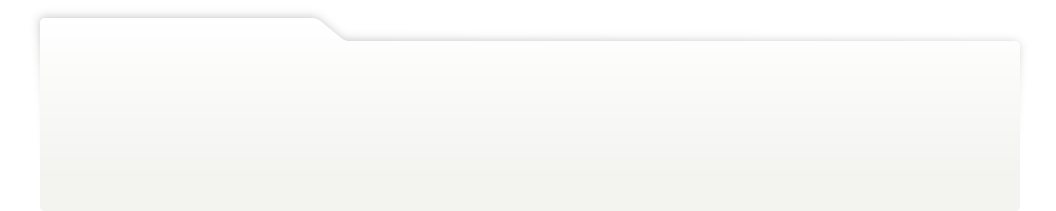
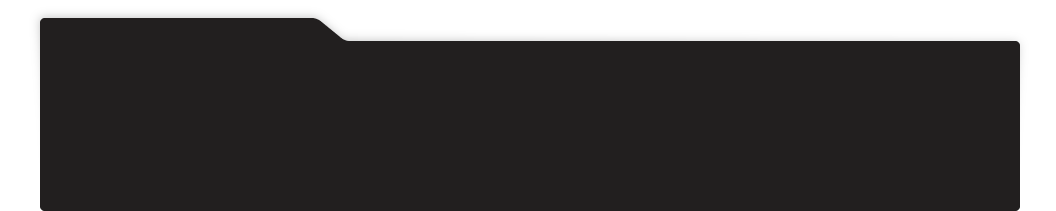
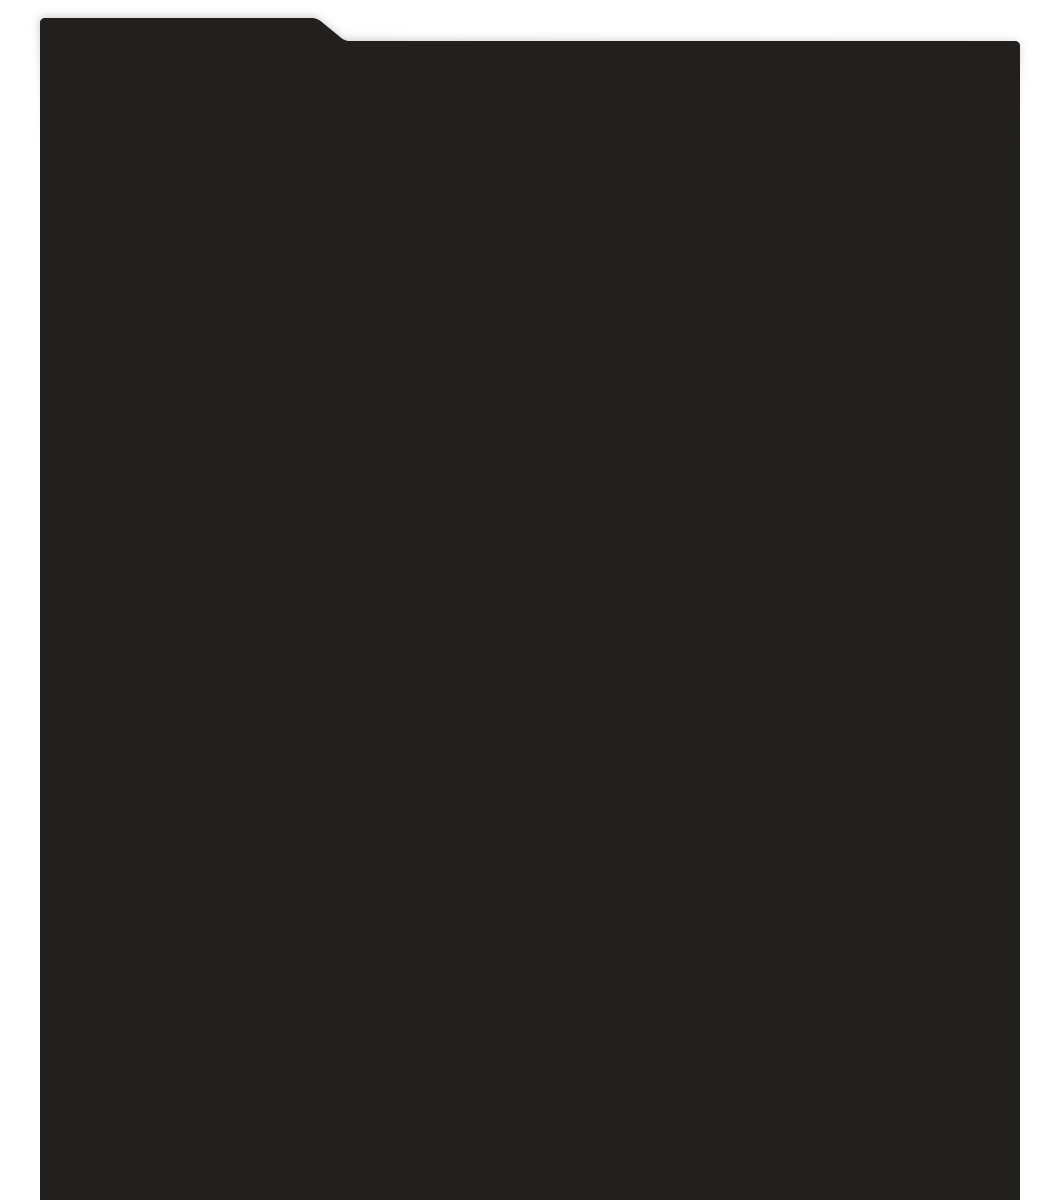
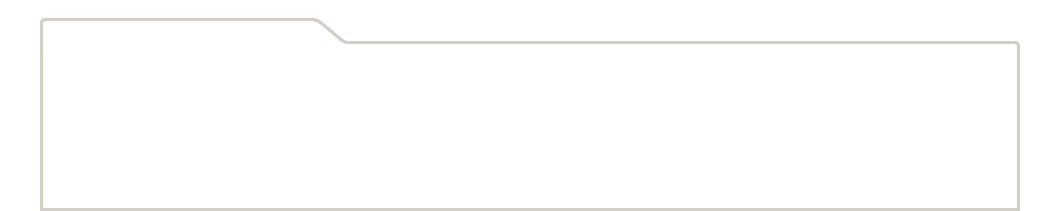
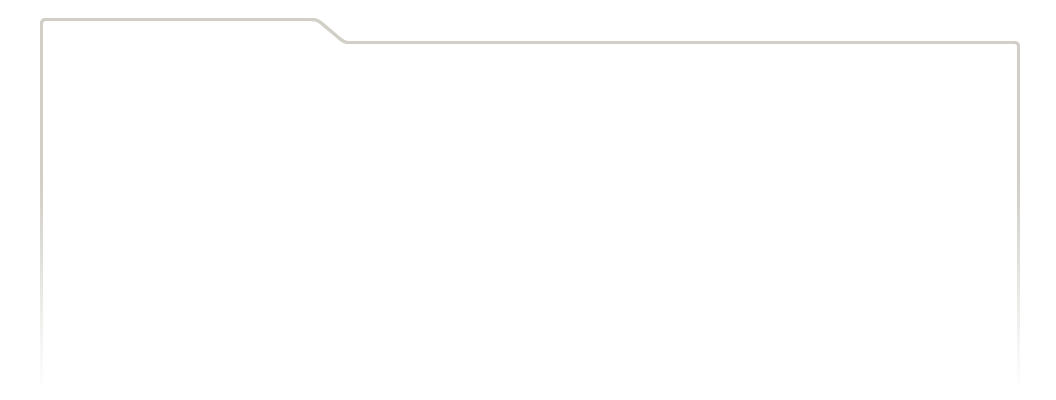
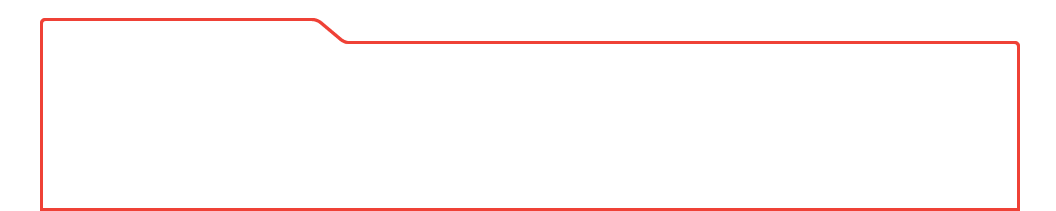
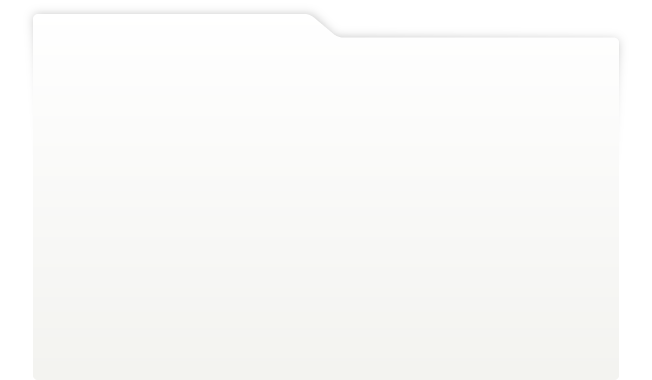
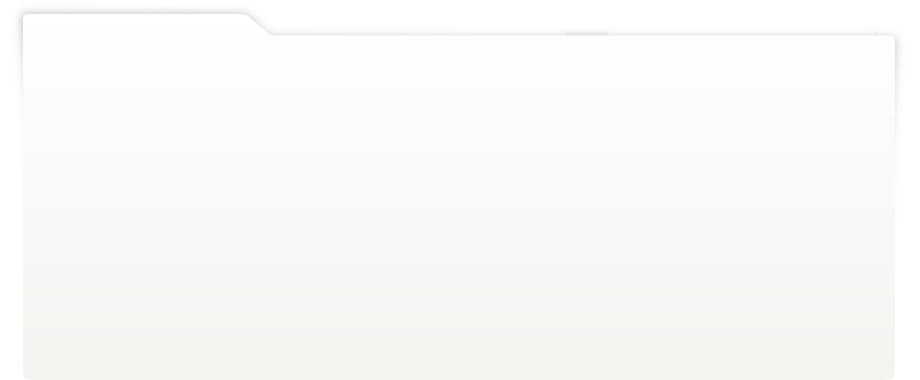
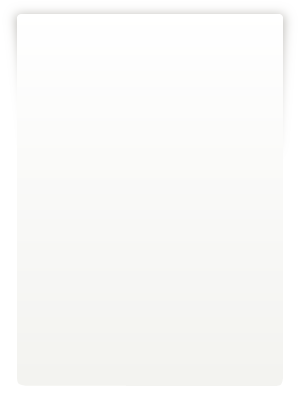
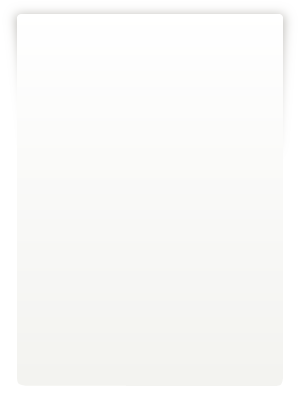
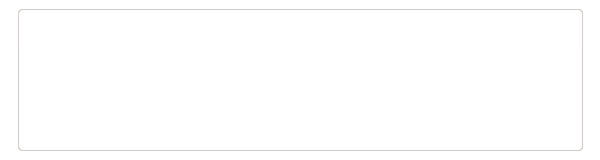
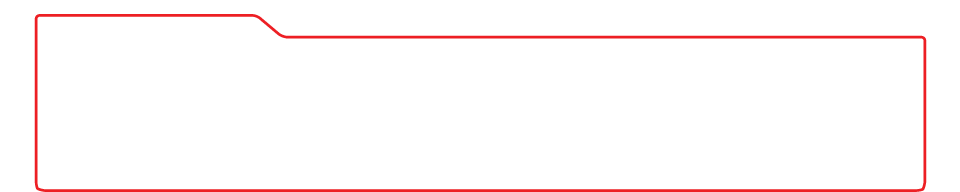
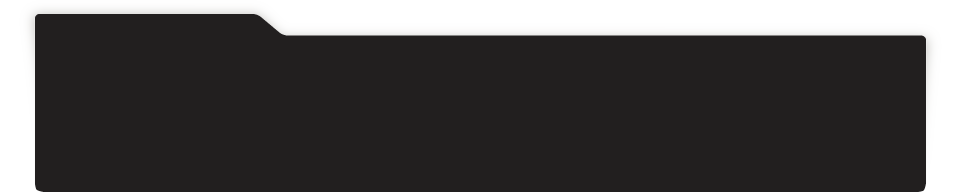
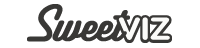
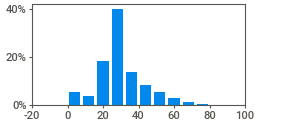
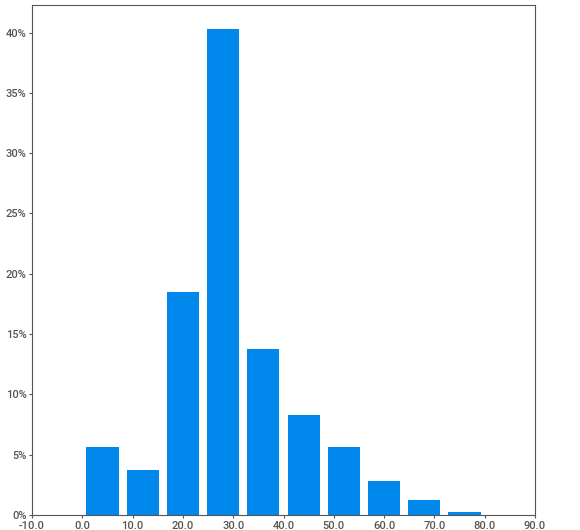
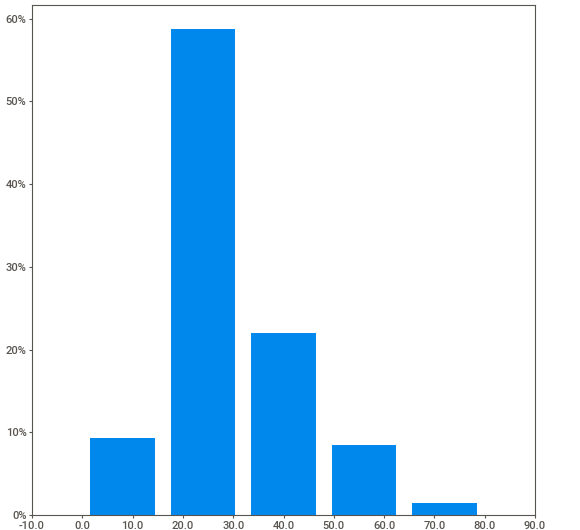
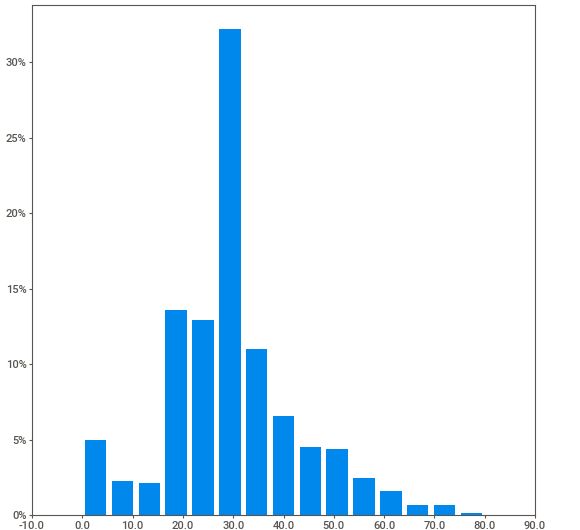
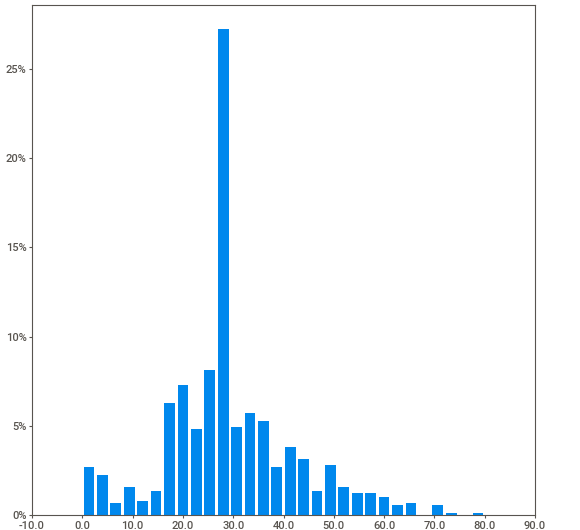
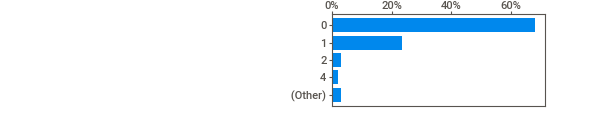
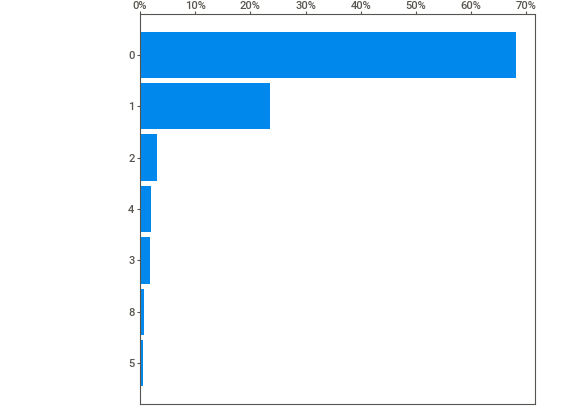
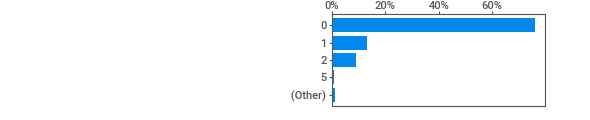
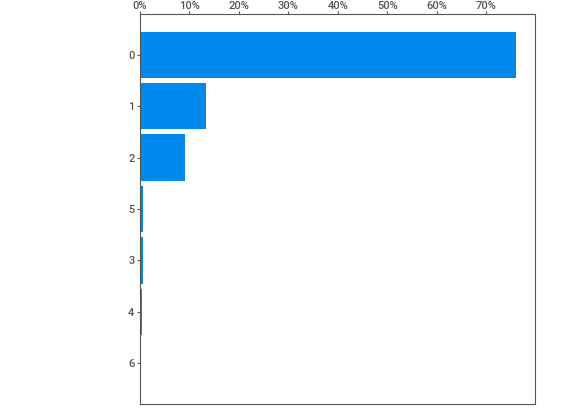
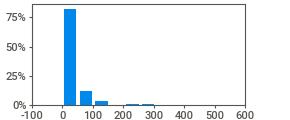
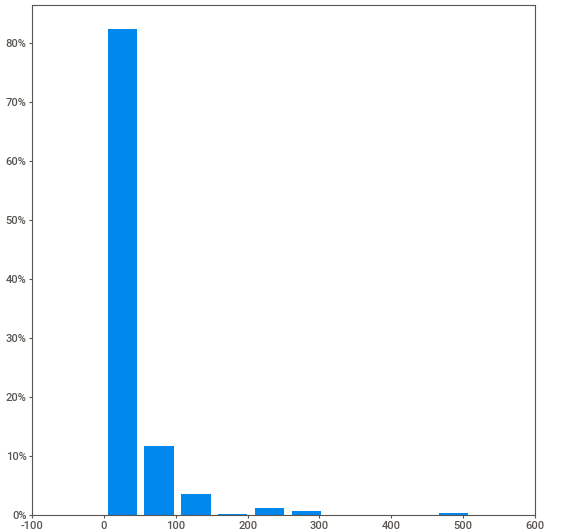
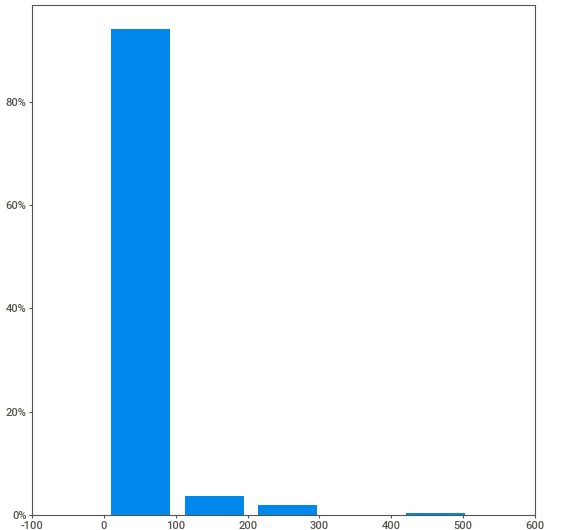
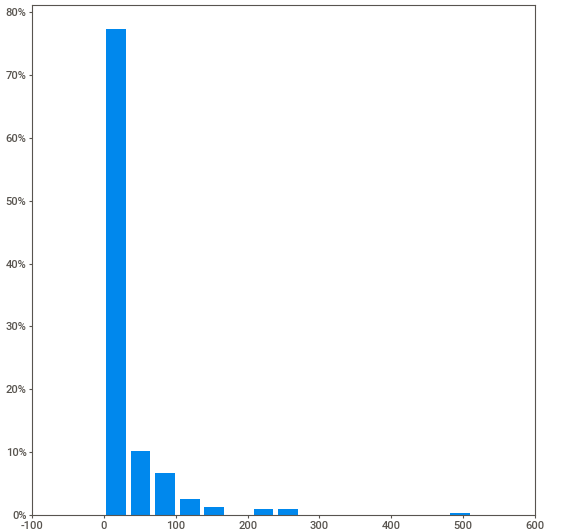
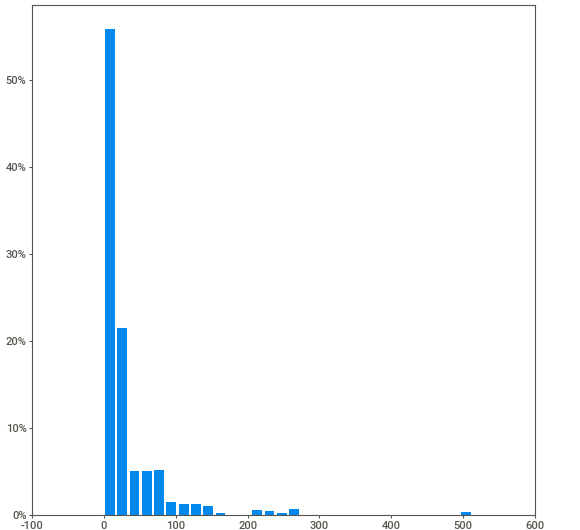
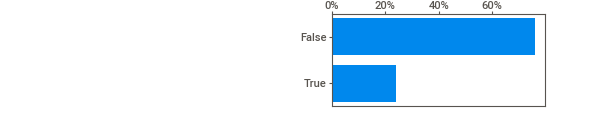
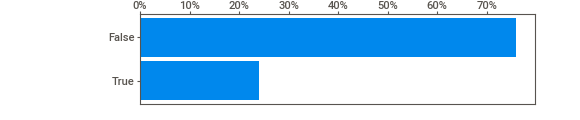
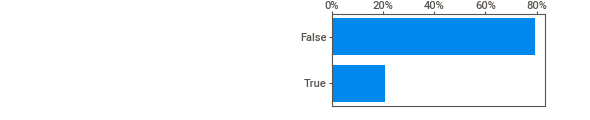
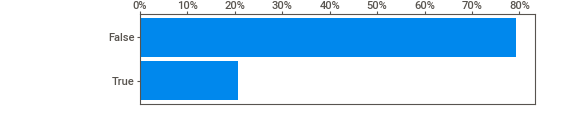
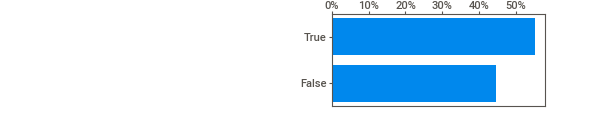
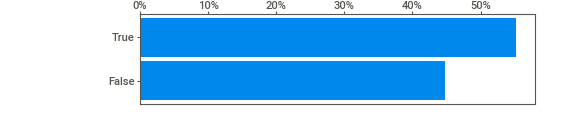
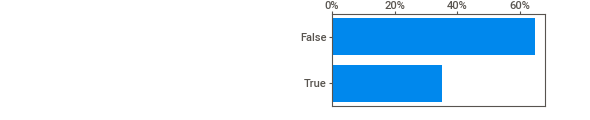
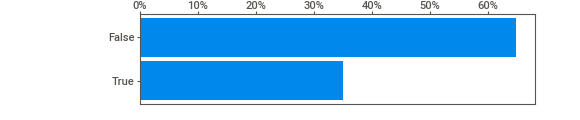
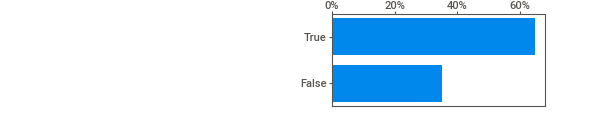
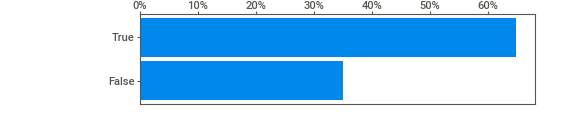
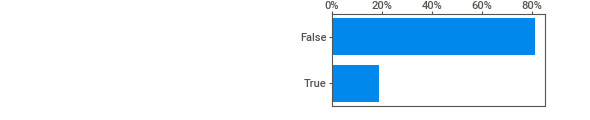
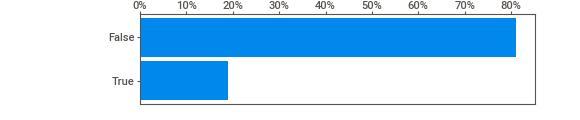
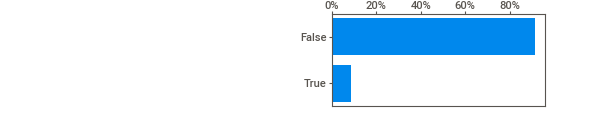
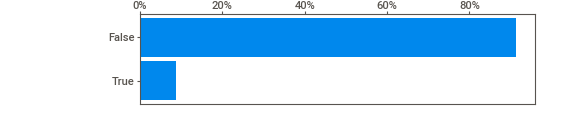
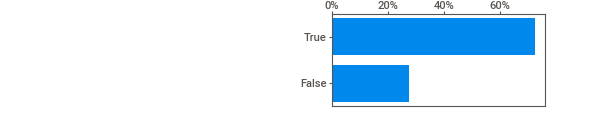
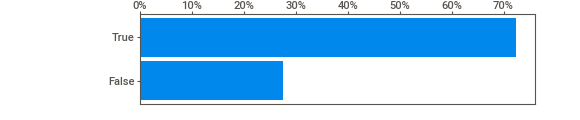
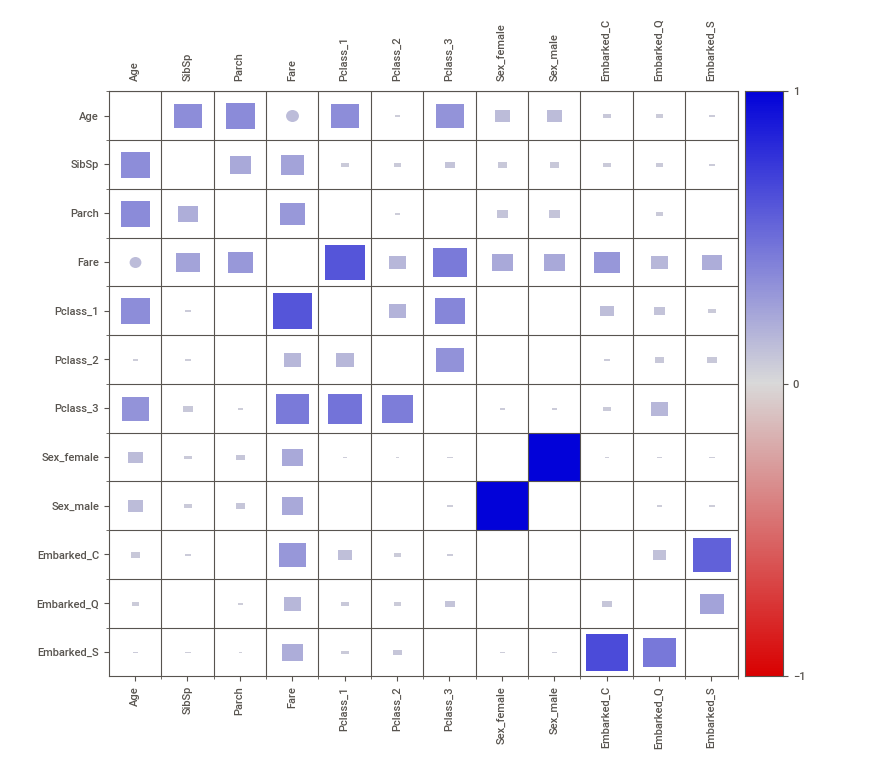
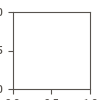

In [ ]:
# import sweetviz as sv

# orig_data_report = sv.analyze(df)
# orig_data_report.show_notebook()

# Interview Readiness Questions

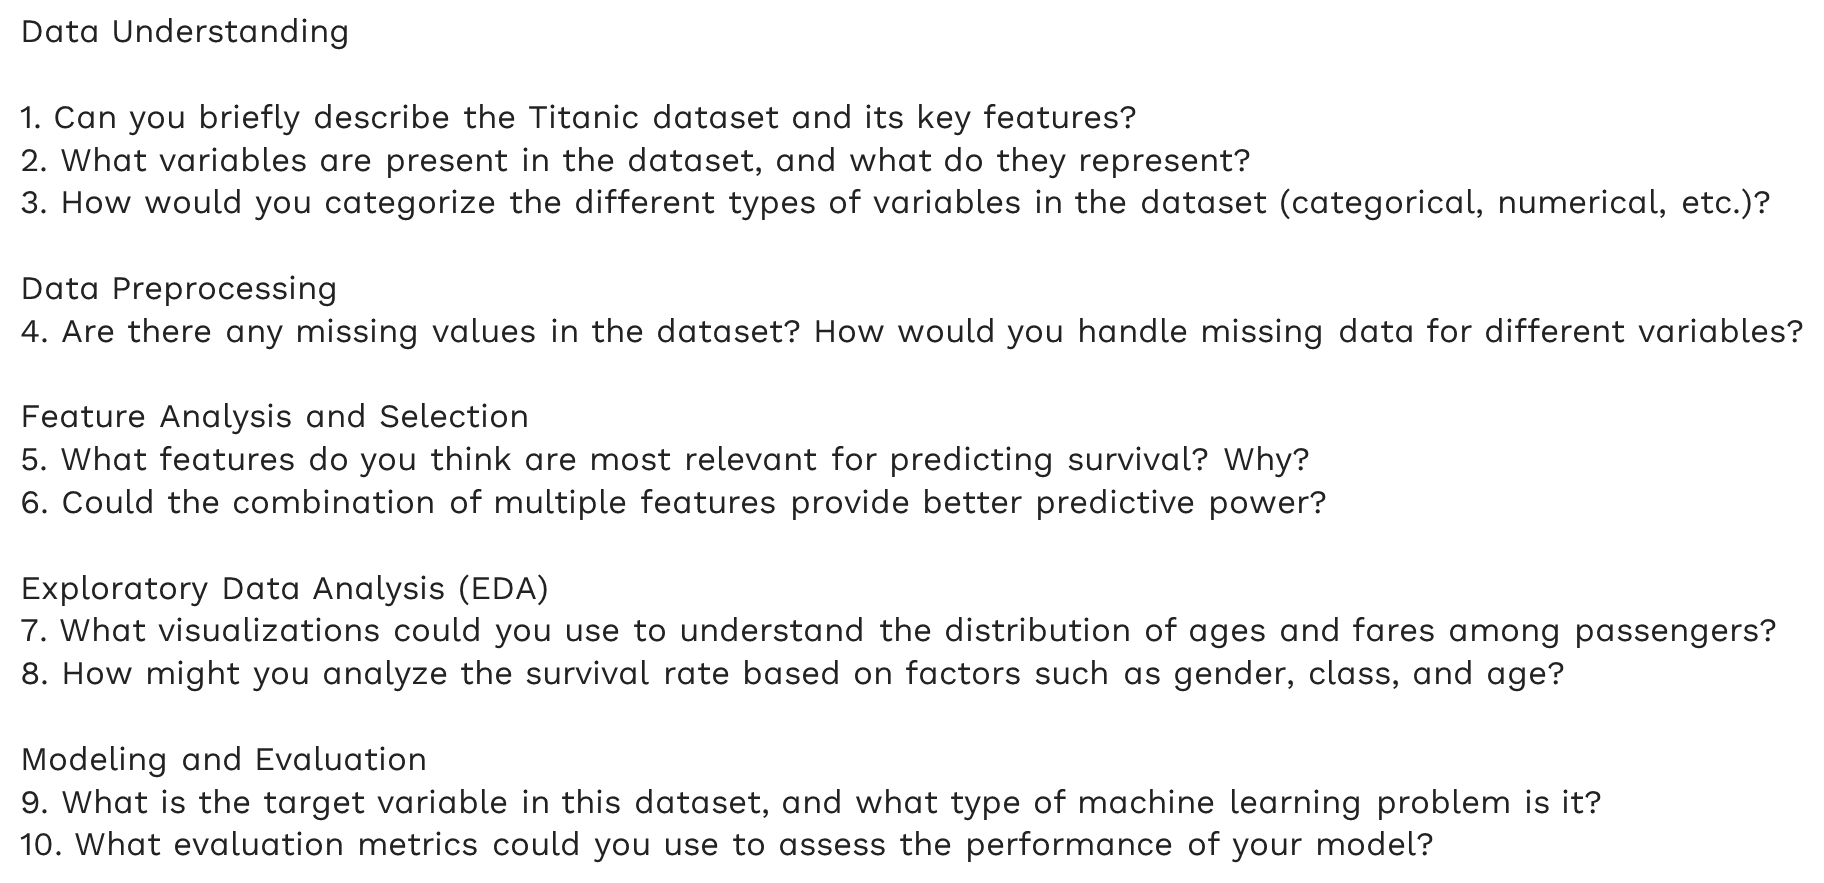

1) The titanic dataset is used for predicting if a passenger survived or not based on certain features. The features are : passengerid, survived, pclass, name, sex, age, sibsp, parch, ticket,fare,cabin,embarked

2) Variables:
Survived: This is the target variable for predictionthat shows whether the passsenger survived or not.

pclass: shows socio-economic status to assess the impact of class on survival rate.

sex:Gender of the passenger to evaluate the impact of gender on survival

Age:Age of the passenger in years.Used to explore whether age affected survival, with missing values for some passengers.

SibSp:Number of siblings or spouses aboard the Titanic with the passenger.Used to see how having family aboard impacted survival.

Parch: Number of parents or children aboard the Titanic with the passenger.To analyze whether family connections influenced survival chances.

Fare: To study the effect of fare on survival. Higher fares might indicate wealth, and hence, better survival chances.

Embarked:To study if boarding location had any influence on survival.

3) Numerical Variables: Age, Fare, SibSp, Parch.
Categorical Variables: Name, Sex, Ticket, Cabin, Embarked, Pclass, Survived.

4) Yes, there are missing values in the dataset as seen using the describe function. For numerical variables, I would impute missing values with the mean, median,based on relevant feature (e.g., class, sex). For categorical variables, if the missing data isn't considerably many like 'embarked', it can be dropped. Otherwise, I'd consider creating a new category for missing values.

5) Pclass: Strong indicator of socio-economic status and access to safety.
Sex: Women had higher survival rates due to evacuation policies.
Age: Younger passengers, especially children, were prioritized.
SibSp and Parch: Family support likely influenced survival positively.
Fare: Higher fares (wealthier passengers) correlated with better survival.
Embarked: Embarkation port may provide demographic insights.

6) Yes, combining multiple features in a model can improve predictive power by capturing interactions and relationships between features that may not be obvious when considering them individually. For example, a combination of
Pclass + Fare: better reflects socio-economic status and cabin location.

Sex + Age: Captures the "women and children first" policy.

SibSp + Parch (Family Size): Represents the impact of family support.

7) A histogram would show the frequency of different age groups among passengers, helping me understand the overall distribution (e.g., normal, skewed).
I can quickly see which age groups were most represented on the Titanic (e.g., were there more children, adults, or elderly passengers?).
Fare: A box plot for fare is especially useful for detecting outliers, as some fares (paid by wealthy passengers) will be significantly higher than others.

8) To analyze the survival rate based on factors such as gender, class, and age,I will perform a combination of statistical analysis and visualization. For example bar plots can be used for survival by gender and class to see the difference in survival rate based on those factors. Scatter plot can be to visualize how survival rates vary by age within each class.

9) The target variable in the Titanic dataset is the "Survived" column, which indicates whether a passenger survived the disaster.

This is a supervised classification problem because the dataset provides labeled data, where the target variable "Survived" is already known for each passenger. The goal is to predict a categorical outcome based on features like age, gender, class, etc.

10) Accuracy, Precision, Recall, Confusion matix